In [ ]:
import sisl
import sisl.viz
import plotly.express as px

In [ ]:
hBN = sisl.geom.honeycomb(1.5, [('B'), ('N')])

In [ ]:
hBN

In [ ]:
hBN.plot(axes="xy")

In [19]:
hBN.xyz

array([[0. , 0. , 0. ],
       [1.5, 0. , 0. ]])

In [20]:
hBN.cell

array([[ 2.25      , -1.29903811,  0.        ],
       [ 2.25      ,  1.29903811,  0.        ],
       [ 0.        ,  0.        , 15.        ]])

Agafem les dades de la cel·la que hem obtingut i les posem al fitxer geom.fdf per tal de poder-lo córrer amb SIESTA i obtenir el Hamiltonià que l'afegirem a les cel·les següents.

In [10]:
H = sisl.get_sile("/media/convidat/9AA9-C68F/Lab8_material/entrega/geom.fdf").read_hamiltonian()
H

<sisl.physics.Hamiltonian na=2, no=26, nsc=[5 5 1], dim=2, nnz=11042, spin=unpolarized>

Posem els punts que ens interessen perquè són els més simètrics i d'aquesta manera no cal explorar tot l'espai. seran diferents dels del grafè, hem agafat els mateixos que els de l'ajuda del sisl.

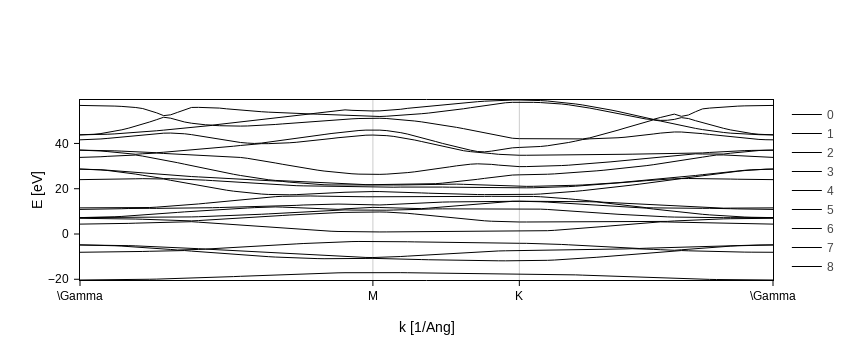

In [11]:
band_struct = sisl.BandStructure(H, points=[[0, 0, 0], [2/3, 1/3, 0], [1/2, 1/2, 0], [1, 1, 0]],
    divisions=100, names=[r"\Gamma", "M", "K", r"\Gamma"]
)

band_struct.plot()

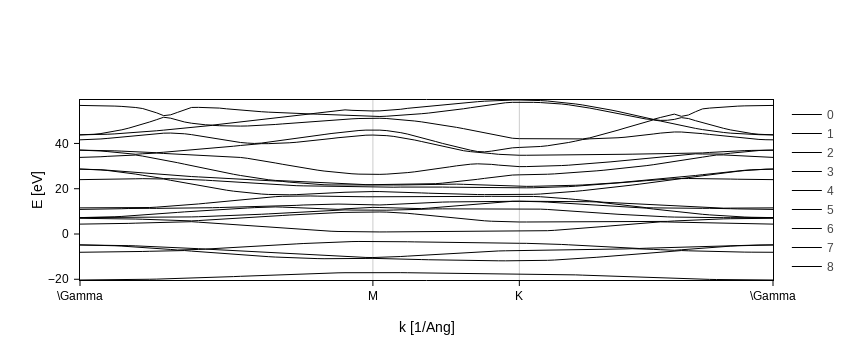

In [12]:
# Get the fatbands plot
fatbands = band_struct.plot.fatbands()
fatbands

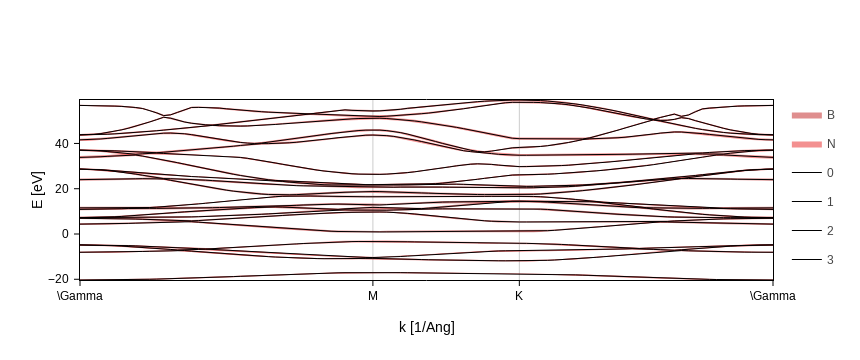

In [13]:
fatbands.split_orbs(on="species", name="$species")

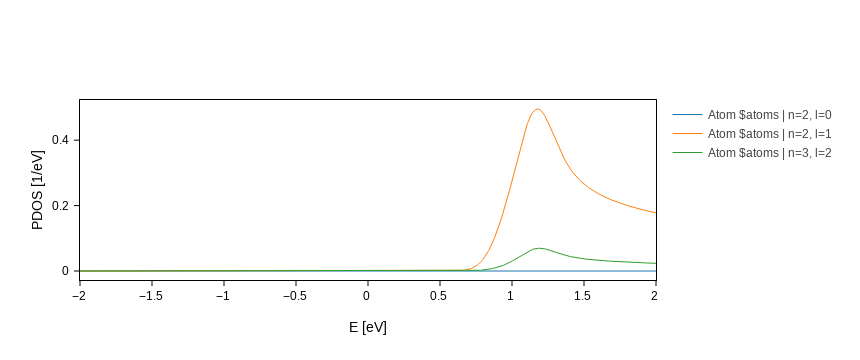

In [14]:
# Get the PDOS plot
pdos_plot = H.plot.pdos(
    kgrid=[90,90,1], nE=1000, Erange=[-10, 10],
    distribution=sisl.get_distribution(method="gaussian", smearing=0.1)
)
# Split the contributions by the n and l quantum numbers
pdos_plot.split_DOS(on="n+l", name="Atom $atoms")

Les dades no ens donen com a la bibliografia i els exemples de sisl de manera que canviarem el Hamiltonià perquè les energies estiguin centrades de manera que posarem els potencials a 2 i -2.

In [15]:
H[0, 0] = 2
H[1, 1] = -2

H[0, 1] = -2.7
H[1, 0] = -2.7

H[0, 1, (-1, 0)] = -2.7
H[0, 1, (0, -1)] = -2.7
H[1, 0, (1, 0)] = -2.7
H[1, 0, (0, 1)] = -2.7


In [16]:
H

<sisl.physics.Hamiltonian na=2, no=26, nsc=[5 5 1], dim=2, nnz=11042, spin=unpolarized>

In [23]:
band = sisl.BandStructure(
    H,
    [[0.0, 0.0], [2.0 / 3, 1.0 / 3], [1.0 / 2, 1.0 / 2], [1.0, 1.0]],
    301,
    [r"Gamma", "K", "M", r"Gamma"],
)


In [26]:
fatbands = band.plot.fatbands()
fatbands

LinAlgError: The leading minor of order 2 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.

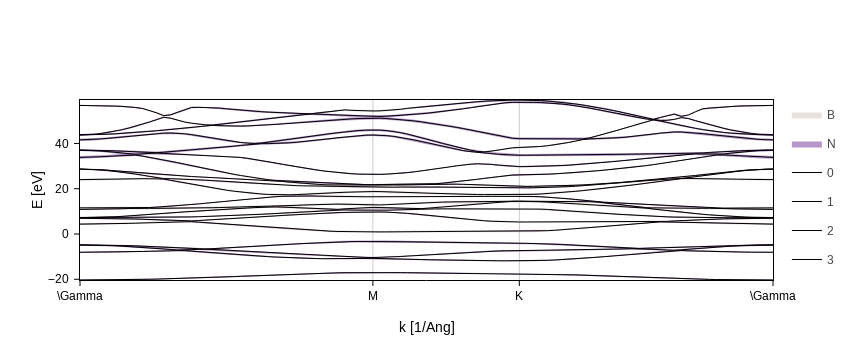

In [27]:
fatbands.split_orbs(on="species", name="$species")

In [28]:
rho = sisl.get_sile("/media/convidat/9AA9-C68F/Lab8_material/Practica/inputs9r/geom.fdf").read_grid("RHO")


dep:0: SislDeprecation:

__init__ argument bc has been deprecated (removed) in favor of the boundary conditions in Lattice, please update your code. [>=0.15.0]

